# Car Price Prediction

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
df = pd.read_csv('CarPricesPrediction.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Make       1000 non-null   object 
 1   Model      1000 non-null   object 
 2   Year       1000 non-null   int64  
 3   Mileage    1000 non-null   int64  
 4   Condition  1000 non-null   object 
 5   Price      1000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [9]:
df.head()

,Make,Model,Year,Mileage,Condition,Price
0,Ford,Silverado,2022,18107,Excellent,19094.75
1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,Chevrolet,Civic,2016,46054,Good,23697.30
3,Ford,Civic,2022,34981,Excellent,18251.05
4,Chevrolet,Civic,2019,63565,Excellent,19821.85


## Data Cleaning

### Task 1 : Check for null values and remove them

We can see that we don't have any missing data or blank rows in our dataset.

In [10]:
df_with_nulls = df[df.isnull().any(axis=1)]
print(df_with_nulls)

Empty DataFrame
Columns: [Make, Model, Year, Mileage, Condition, Price]
Index: []


### Task 2 : Check & assign appropriate datatypes to the columns

We can see below that datatype of all the columns are correct.

In [11]:
df.dtypes

Make          object
Model         object
Year           int64
Mileage        int64
Condition     object
Price        float64
dtype: object

### Task 3 : Check for incorrect spelling errors

We can see that all the unique values are correct.

In [12]:
df['Make'].unique()

array(['Ford', 'Toyota', 'Chevrolet', 'Nissan', 'Honda'], dtype=object)

In [13]:
df['Model'].unique()

array(['Silverado', 'Civic', 'Altima', 'Camry', 'F-150'], dtype=object)

## Exploratory Data Analysis

In this part, we will explore our data by using differnt visualizations and techniques to better understand our data and see which features of our dataset are related to the **Price** column.

Before starting our EDA, we will first create a dummy feature using column **Condition**.

In [19]:
def get_encoding(condition):
    if condition == 'Excellent':
        return 0
    elif condition == 'Good':
        return 1
    else:
        return 2

In [20]:
df['Condition_Dummy'] = df['Condition'].apply(get_encoding)

### Correlation

We can generate a correlation table using **corr()** method to see the relation between different variables.

In [24]:
df.corr(numeric_only=True)

,Year,Mileage,Price,Condition_Dummy
Year,1.000000,-0.016850,-0.883093,-0.011916
Mileage,-0.016850,1.000000,-0.454250,-0.009978
Price,-0.883093,-0.454250,1.000000,0.015299
Condition_Dummy,-0.011916,-0.009978,0.015299,1.000000


Below, we can create graphs to visualize the relation between Mileage & Year with Price. We can also create a histogram to see where the majority of cars fall in the price range.

<Axes: xlabel='Mileage', ylabel='Price'>

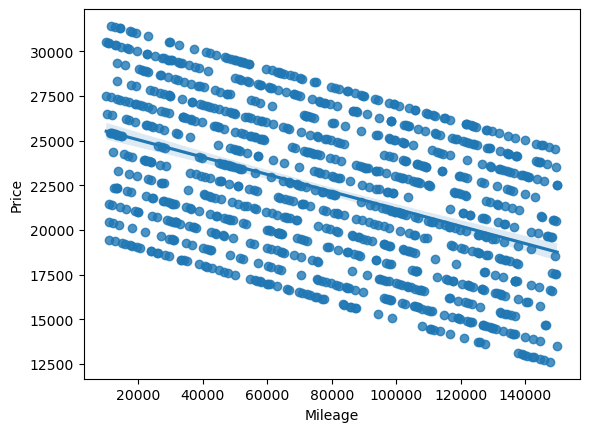

In [25]:
sns.regplot(data=df, x='Mileage', y='Price')

<Axes: xlabel='Year', ylabel='Price'>

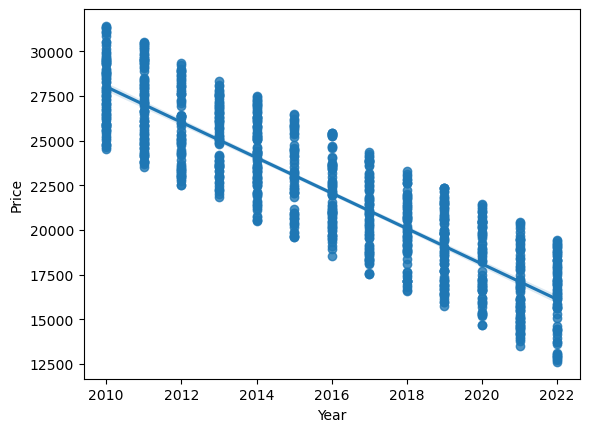

In [26]:
sns.regplot(data=df, x='Year', y='Price')

<Axes: xlabel='Price', ylabel='Count'>

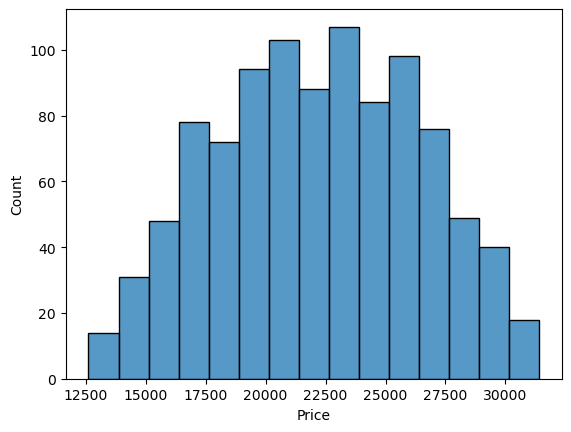

In [55]:
sns.histplot(data=df['Price'])

## Model Building

### Separating dependent & independent features

Before building a machine learning model, we need to store independent & dependent features of our dataset in separate variables.

In [29]:
df.columns

Index(['Make', 'Model', 'Year', 'Mileage', 'Condition', 'Price',
       'Condition_Dummy'],
      dtype='object')

In [128]:
X = df[['Year', 'Mileage']]
y = df['Price']

### Splitting data into train & test data

Below, we are using **train_test_split()** method from sklearn library to divide our data into training & testing data. The training data will be used to train our Linear Regression model & testing data will be used to test the accuracy of our model.

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Creating Linear Regression Model

In the following lines of code, we are importing & creating Linear Regression model. We are also using our training data generated above to train the model.

In [131]:
from sklearn.linear_model import LinearRegression

In [132]:
model = LinearRegression()

In [133]:
model.fit(X_train,y_train)

LinearRegression()

### Using model for predictions

We are now using our trained model to predict the Price of cars. We are also printing our the **slope** & **intercept**.

In [134]:
predictions = model.predict(X_test)

In [135]:
print(model.intercept_)

2041998.6739151976


In [136]:
print(model.coef_)

[-9.99999315e+02 -5.00000253e-02]


In [137]:
cdf=pd.DataFrame(model.coef_,X.columns,columns=['Coeff'])

In [138]:
cdf

,Coeff
Year,-999.999315
Mileage,-0.050000


### Model Accuracy

In lines below, we are visualizing & printing out the metrics like **MAE**, **MSE** & **RMSE** to check the accuracy of our model.

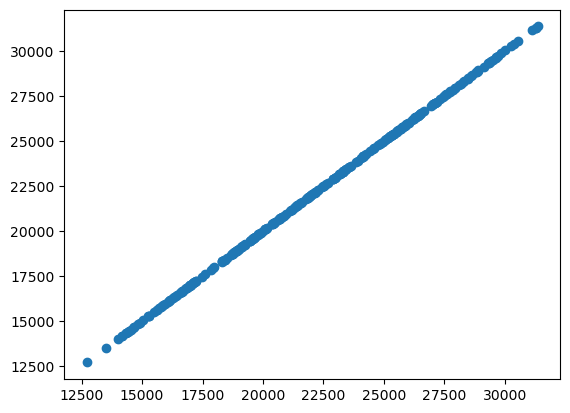

In [139]:
plt.scatter(y_test,predictions)

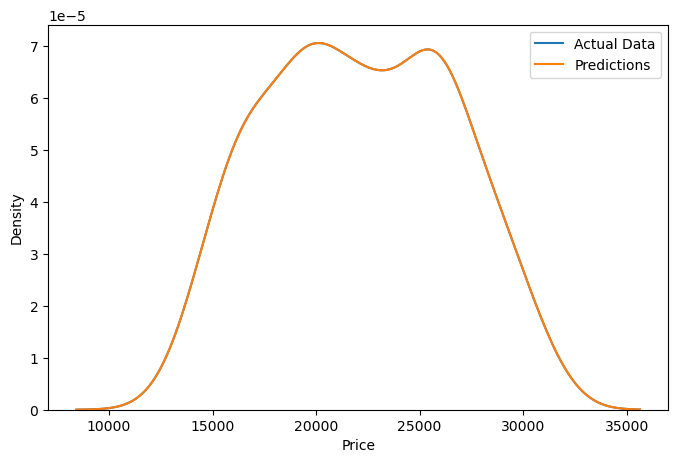

In [140]:
plt.figure(figsize=(8,5))
sns.kdeplot(y_test,label="Actual Data")
sns.kdeplot(predictions,label="Predictions")
plt.legend()

In [141]:
from sklearn import metrics

In [142]:
print("Mean Absolute Error (MAE):",metrics.mean_absolute_error(y_test,predictions))

Mean Absolute Error (MAE): 0.05850335148709443


In [143]:
print("Mean Squared Error (MSE):",metrics.mean_squared_error(y_test,predictions))

Mean Squared Error (MSE): 0.004288272114669477


In [144]:
print("Root Mean Squared Error (RMSE):",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Root Mean Squared Error (RMSE): 0.06548489989814046
